# **DSC-520 PROJECT 3 (Verifying Assumption)**

#### Description
This assignment is based on the concept of linear regression and its assumptions. The dataset used is from the UCI Machine Learning Repository. The dataset is used to build a predictive model using linear regression and analyze the residuals. The assumptions of linear regression are verified using plots.

Author: Mohini Agarwal

Date: 2025-02-19

Using Python 3.12.3

--- 

Instructions (from Halo)--

For this activity, perform the following:

1. Access the repository and use the dataset provided by the instructor.
2. Describe a predictive model you could build using this dataset and present it, including the analysis of the residuals.
3. Verify the assumptions of the linear regression using plots. Explain each test, comment on the code, and interpret the test result for: a) Linear relationship: Each predictor variable xi and the outcome variable y. Use the plot function and which=1; b) Independence: The residuals are independent. Use durbinWatsonTest function in the car package; c) Homoscedasticity: The residuals have constant variance at every level of x. Use plot function and which=3; and d) Normality: The residuals of the model are normally distributed. Use the plot function and which=2.
4. Verify the assumption of homoscedasticity computationally using the Non-Constant Variance Score (NCV) test (ncvTest function). Explain the test, the R code, and interpret the test results. Explain the relationship between NCV and the Durbin-Watson test.
5. Assess the presence of significant outliers and explain their potential impact. Use the plot function and which=5, and the Cook distance.
6. Explain how you would mitigate the impact of the outlier. Then, implement measures to mitigate the impact of outliers (e.g., removal or other transformations of the data).
7. Discuss what other tests/transformations you could use if there are no outliers. Could a log transformation for reducing skewness be used? Explain.
8. Repeat steps 4-5, using the "cleaner" dataset.
9. Test collinearity using the Variance Inflation Factor. Use the vif function in R or Python.
10. Assess the overall validity of the regression model and present your final assessment regarding its readiness and suitability for making predictions.
11. Given your analysis, describe the recommendations you would make to a researcher intent on using this data in a multiple linear regression model.

Then, submit a professionally written and formatted software-based technical report. Make sure the documentation contains the code, relevant plots, your analysis, and the appropriate citations and references.

While APA style is not required for the body of this assignment, solid academic writing is expected, and documentation of sources should be presented using APA formatting guidelines, which can be found in the APA Style Guide, located in the Student Success Center.

This assignment uses a rubric. Review the rubric prior to beginning the assignment to become familiar with the expectations for successful completion.

---

In [54]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import anderson
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats

### 1) Access the repository and use the dataset provided by the instructor

In [55]:
# Loading the dataset
df = pd.read_csv("machine_data.csv")
df.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [56]:
# Checking the shape of the dataset
df.shape

(209, 10)

The dataset contains 209 rows and 10 columns. The columns represent the following variables:
1. vendor_name: Name of the vendor
2. model_name: Name of the model
3. MYCT: Machine cycle time in nanoseconds (integer)
4. MMIN: Minimum main memory in kilobytes (integer)
5. MMAX: Maximum main memory in kilobytes (integer)
6. CACH: Cache memory in kilobytes (integer)
7. CHMIN: Minimum channels in units (integer)
8. CHMAX: Maximum channels in units (integer)
9. PRP: Published relative performance (integer)
10. ERP: Estimated relative performance from the original article (integer)

In [57]:
# Checking the data types of the columns
df.dtypes

vendor_name    object
model_name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

In [58]:
# Checking for missing values
df.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

There are no missing values in the dataset. We can proceed with the analysis.

In [59]:
# Creating a copy of the dataset
df1=df.copy()

### Data Preprocessing
- Dropping unnecessary columns: 'vendor_name', 'model_name', 'ERP'
- Checking for correlation between variables
- Visualizing the correlation matrix
- Checking the distribution of the variables
- Checking for outliers using boxplots

In [60]:
# Dropping unnecessary columns
df1.drop(columns=['vendor_name', 'model_name', 'ERP'], inplace=True)

In [61]:
# Display summary statistics
df1.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


The summary statistics provide insights into the distribution of the variables:
- Machine Cycle Time (MYCT): Ranges from 17 to 1500 ns, with a median of 110 ns, showing high variability.
- Memory (MMIN/MMAX): Wide range (64–32,000 KB / 64–64,000 KB), median values 2000 KB / 8000 KB, indicating diverse system capabilities.
- Cache Memory (CACH): Varies from 0 to 256 KB, with many systems lacking cache (median 8 KB).
- Channels (CHMIN/CHMAX): Broad range (0–52 / 0–176), with median values 2 / 8, highlighting different hardware configurations.
- Published Relative Performance (PRP): Large spread (6–1150), median 50, and high standard deviation, suggesting significant performance differences.
- The variables exhibit varying scales and ranges, which may require normalization or standardization for modeling.

The dataset exhibits skewed distributions, diverse system architectures, and high variation in performance.


In [62]:
# Checking for correlation between variables
correlation = df1.corr()
correlation

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


The correlation matrix provides insights into the relationships between variables:
1. PRP (Published Relative Performance):
    - Strong positive correlation with MMAX (0.86) and MMIN (0.79) → More memory generally leads to higher performance.
    - Moderate correlation with CACH (0.66), CHMIN (0.61), CHMAX (0.61) → Larger cache and more channels contribute to better performance.
    - Weak negative correlation with MYCT (-0.31) → Faster cycle times slightly improve performance.
2. Memory (MMIN/MMAX):
    - MMAX and MMIN are highly correlated (0.76) → Systems with high minimum memory also tend to have high maximum memory.
    - Both correlate well with CACH (0.54–0.54), CHMIN (0.56–0.52), CHMAX (0.53–0.27) → More memory is often paired with higher cache and channels.
3. Cache (CACH):
    - Strong correlation with CHMIN (0.58) and CHMAX (0.49) → Systems with more cache tend to have more channels.
4. MYCT (Machine Cycle Time):
    - Negatively correlated with all key performance-related variables (PRP, MMAX, MMIN, CACH, CHMIN, CHMAX) → Lower cycle times tend to be associated with higher-performing systems.

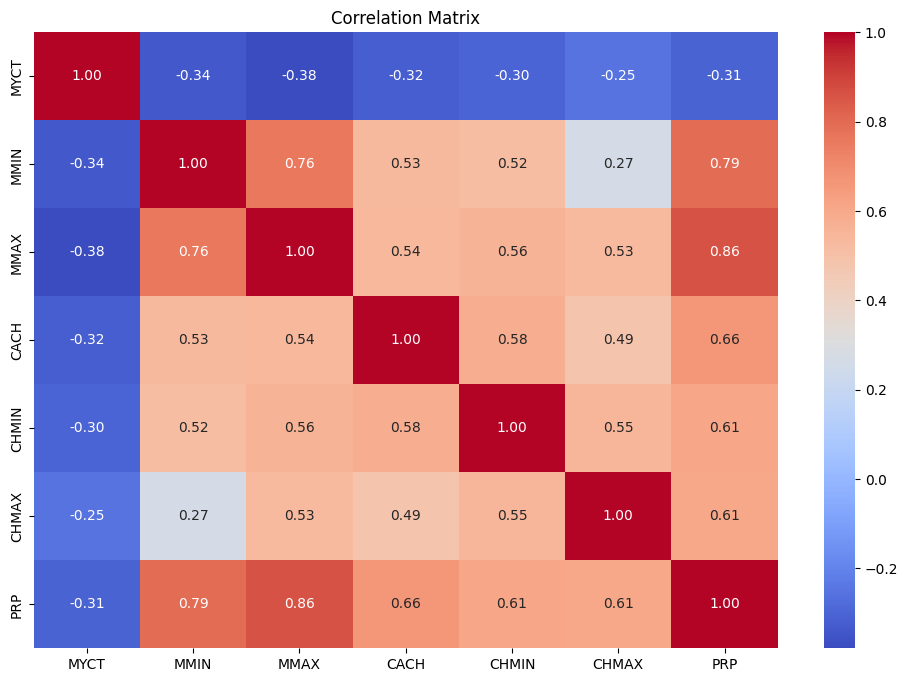

In [63]:
# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation heatmap provides a visual representation of the relationships between variables:
- Darker shades indicate stronger correlations, while lighter shades represent weaker correlations.
- The heatmap confirms the correlation values observed in the correlation matrix.
- Strong positive correlations are visible between PRP and memory variables (MMIN, MMAX) and moderate correlation with CACH, CHMIN, and CHMAX.
- The correlations suggest that memory, cache, and channels are key factors influencing system performance.

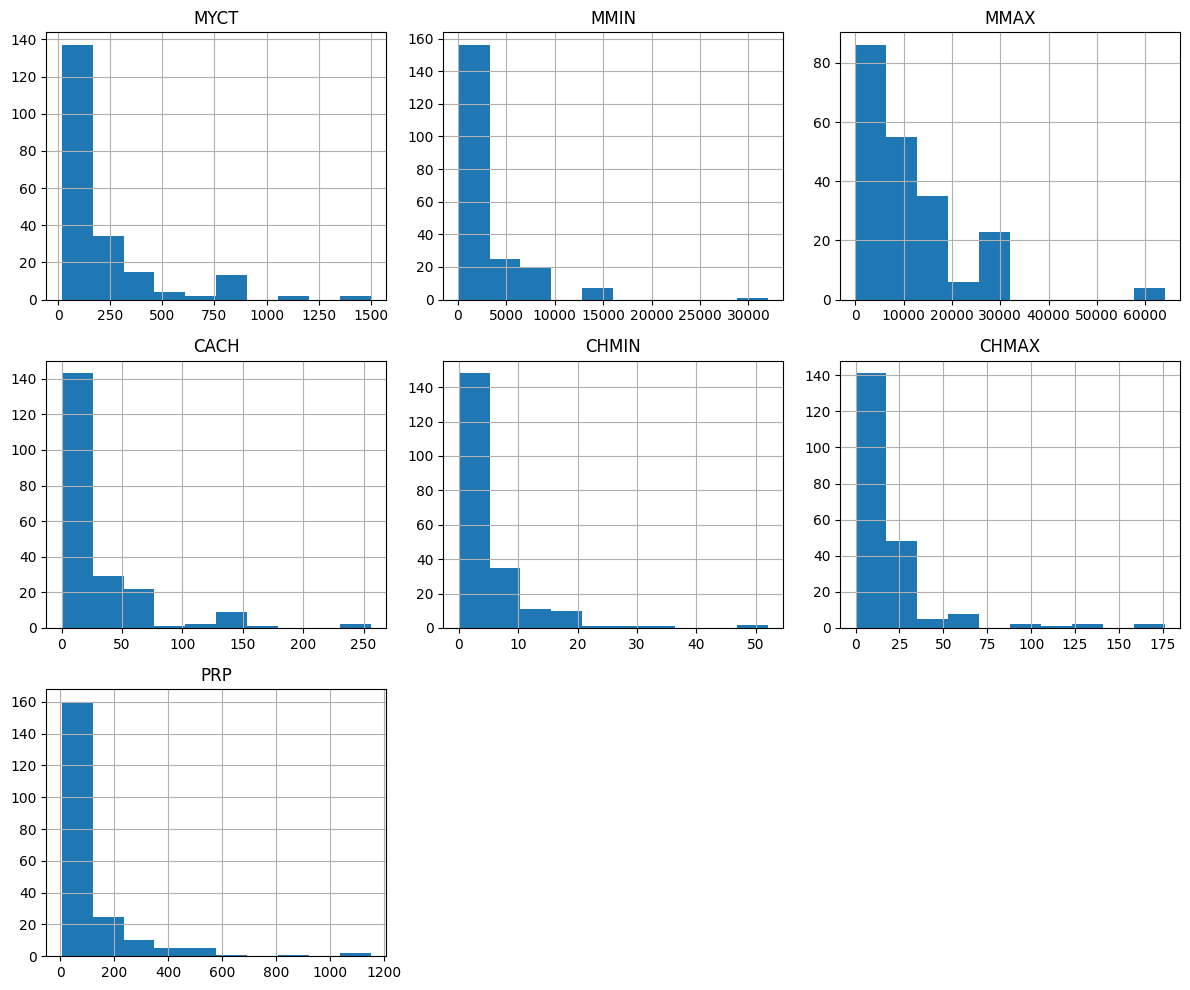

In [64]:
# Checking the distribution of the variables
df1.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

The histograms show the distribution of variables:
- Most variables are right-skewed, with long tails to the right.
- MYCT (Machine Cycle Time) is heavily right-skewed, with a few systems having very high cycle times.
- MMIN and MMAX (Memory) are also right-skewed, with a wide range of memory capacities.
- CACH (Cache) has many systems with low cache memory and a few with higher cache sizes.
- CHMIN and CHMAX (Channels) are right-skewed, with a wide range of channel configurations.
- PRP (Published Relative Performance) is right-skewed, indicating a wide range of performance ratings or presence of outliers.

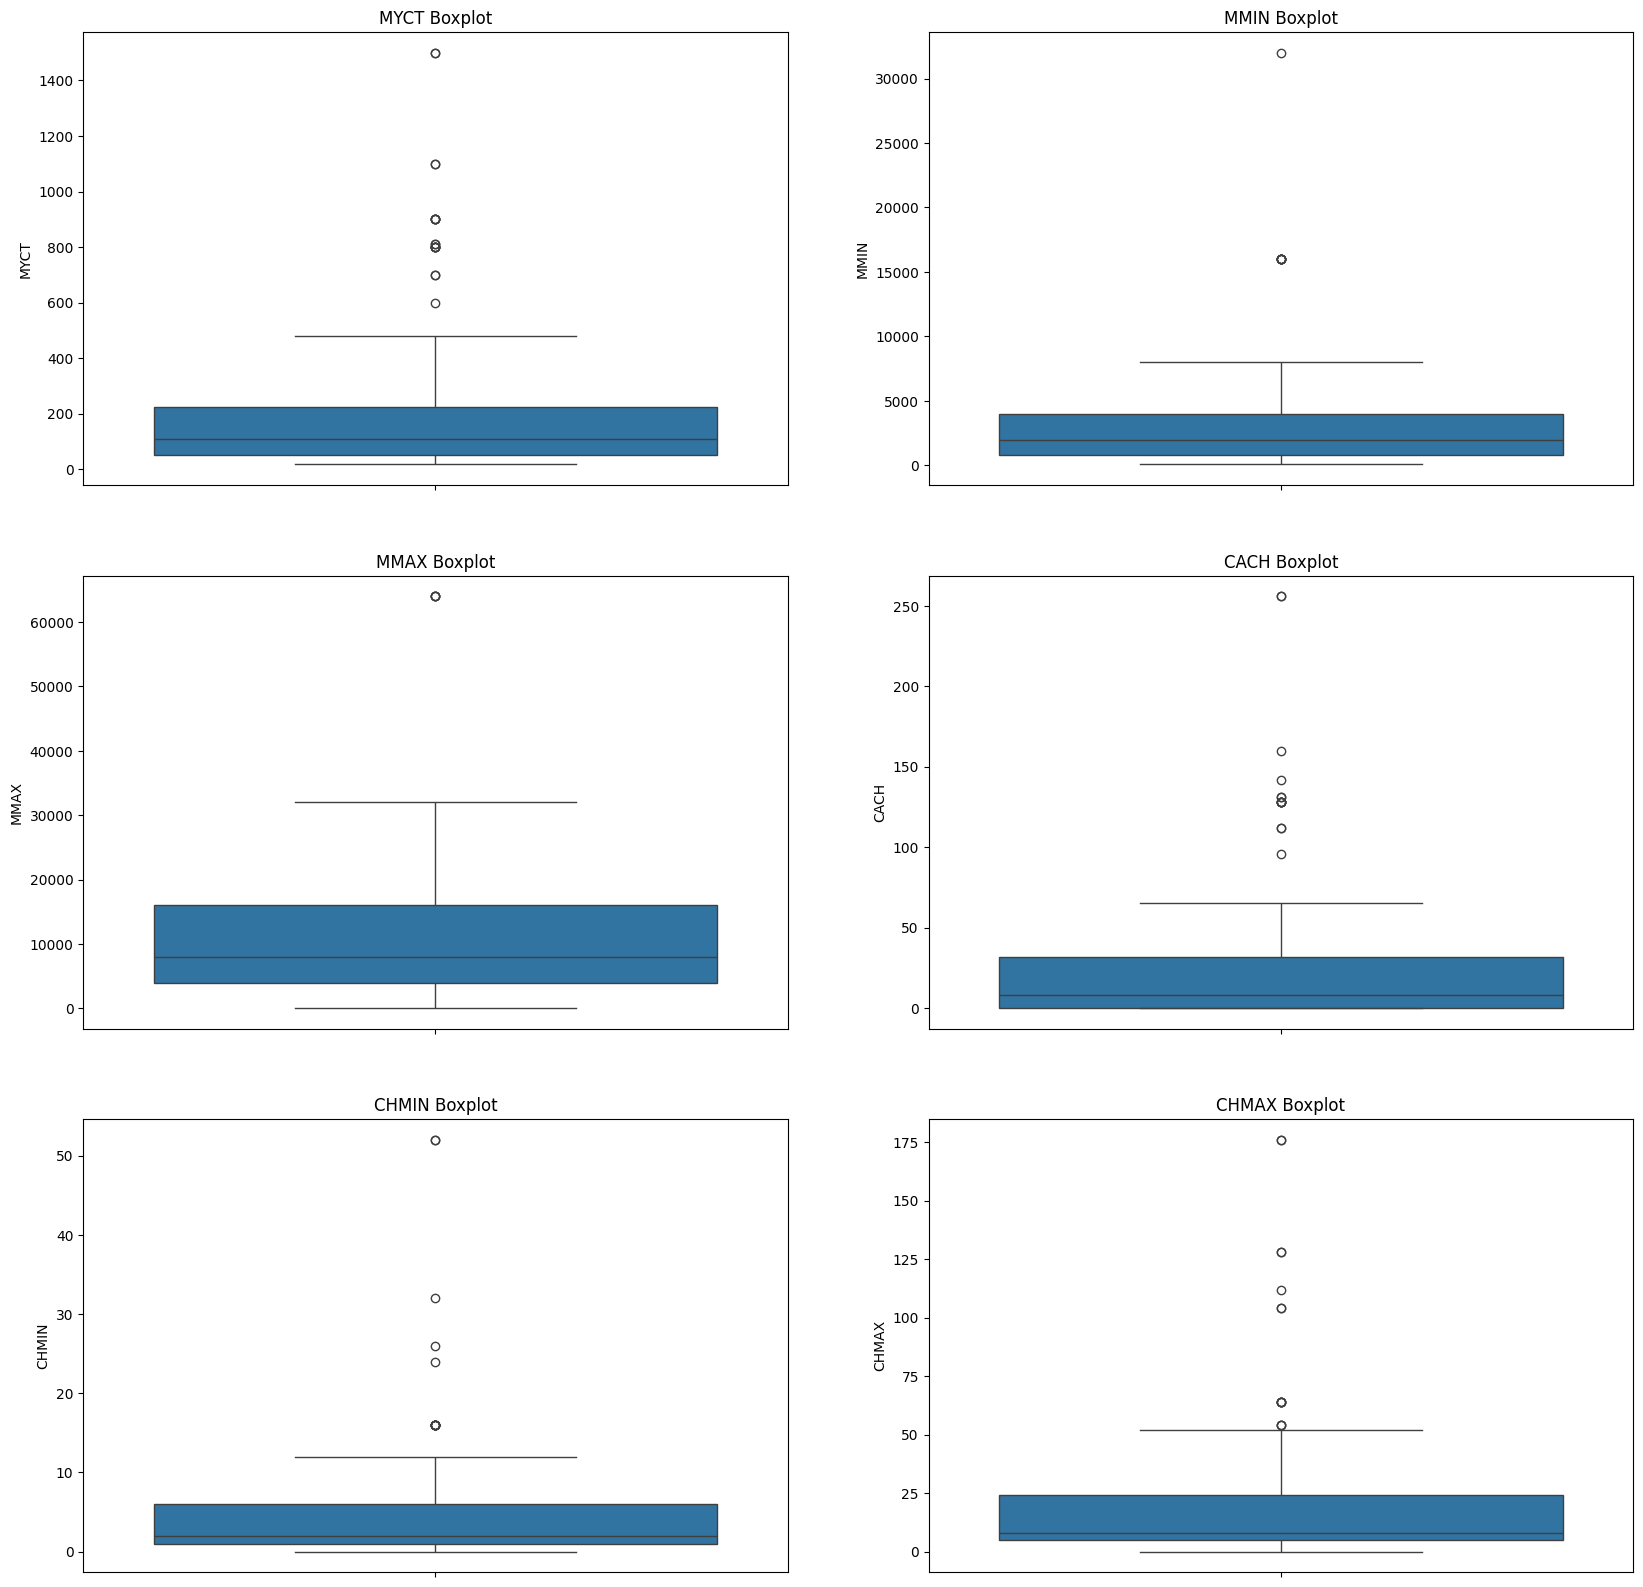

In [65]:
# Checking for outliers using boxplots
# Checking for outliers
plt.figure(figsize=(20, 20))
# Box plot for MYCT
plt.subplot(3, 2, 1) 
sns.boxplot(df1['MYCT'])
plt.title('MYCT Boxplot')

# Box plot for MMIN
plt.subplot(3, 2, 2)
sns.boxplot(df1['MMIN'])
plt.title('MMIN Boxplot')

# Box plot for MMAX
plt.subplot(3, 2, 3)
sns.boxplot(df1['MMAX'])
plt.title('MMAX Boxplot')

# Box plot for CACH
plt.subplot(3, 2, 4)
sns.boxplot(df1['CACH'])
plt.title('CACH Boxplot')

# Box plot for CHMIN
plt.subplot(3, 2, 5)
sns.boxplot(df1['CHMIN'])
plt.title('CHMIN Boxplot')

# Box plot for CHMAX
plt.subplot(3, 2, 6)
sns.boxplot(df1['CHMAX'])
plt.title('CHMAX Boxplot')

plt.show()

The boxplots show the distribution of variables and identify potential outliers:
- MYCT: Max (1500 ns) is far from Q3 (225 ns), suggesting high-end outliers.
- MMIN/MMAX: MMAX (64,000 KB) and MMIN (32,000 KB) greatly exceed Q3, indicating extreme values.
- CACH: Many systems have 0 KB, while max (256 KB) is 8× Q3 (32 KB), pointing to high outliers.
- CHMIN/CHMAX: CHMAX (176) vs. Q3 (24) and CHMIN (52) vs. Q3 (6) suggest significant upper-end outliers.
- PRP: Max (1150) is far from Q3 (113) with high standard deviation, indicating extreme performance variations.

### 2) Describe a predictive model you could build using this dataset and present it, including the analysis of the residuals.

The dataset contains various features that can be used to predict the performance rating of the computer systems. We can build a predictive model using multiple linear regression to predict the performance rating (PRP) based on the other features in the dataset. 

Let's build a multiple linear regression model to predict the performance rating (PRP) based on the other features in the dataset.
- The goal is to build a multiple linear regression model where the dependent variable (outcome) is PRP (Published Relative Performance).
- The independent variables include MYCT, MMIN, MMAX, CACH, CHMIN, and CHMAX.

### Building a Multiple Linear Regression Model (Base Model/ Original Model)

In [66]:
# Define independent variables (X) and dependent variable (y)
X = df1.drop(columns=['PRP'])
y = df1['PRP']


In [67]:
# Adding constant term
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Displaying model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PRP   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     215.5
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           6.24e-85
Time:                        21:48:58   Log-Likelihood:                -1148.7
No. Observations:                 209   AIC:                             2311.
Df Residuals:                     202   BIC:                             2335.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.8939      8.045     -6.948      0.0

### Interpretation of the Base Model:
Model Performance:
- R-squared = 0.865, meaning 86.5% of the variation in PRP is explained by the independent variables.
- Adjusted R-squared = 0.861, indicating a good fit even after adjusting for the number of predictors.
- F-statistic = 215.5 (p < 0.001), confirming overall model significance.

Exploring with the help of Standard Error (**Significanc level of 0.05**):
- The standard errors of the coefficients provide information about the precision of the estimates.
- Intercept (-55.89, SE = 8.045, p < 0.001): The model predicts a baseline PRP of -55.89 when all predictors are zero, but this is not practically meaningful.
- MYCT (0.0489, SE = 0.018, p = 0.006): A 1-unit increase in MYCT increases PRP by 0.0489, but the high SE (0.018) suggests some variability.
- MMIN (0.0153, SE = 0.002, p < 0.001): A strong, precise predictor with a low SE, indicating stable estimates.
- MMAX (0.0056, SE = 0.001, p < 0.001): Similarly significant and precise.
- CACH (0.6414, SE = 0.140, p < 0.001): Higher SE (0.140) suggests moderate variability in its effect on PRP.
- CHMIN (-0.2704, SE = 0.856, p = 0.752): Not significant, with a very high SE (0.856) indicating an unstable estimate.
- CHMAX (1.4825, SE = 0.220, p < 0.001): A large positive effect with relatively low variability.

Significance of Predictors: 
- MMIN, MMAX, CACH, and CHMAX have statistically significant (p < 0.05) positive effects on PRP.
- MYCT has a small but significant positive impact.
- CHMIN is not significant (p = 0.752) and may not contribute meaningfully to the model.

Potential Issues:
- Multicollinearity concern (high condition number = 33,200).
- Non-normal residuals (high skewness & kurtosis, confirmed by Jarque-Bera test, p < 0.001).
- Autocorrelation possible (Durbin-Watson = 1.202, suggesting mild positive correlation).

### Building a Multiple Linear Regression Model (Using standardized predictors)

In [68]:
# Standardizing predictors
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Adding a constant term
X_scaled = sm.add_constant(X_scaled)
# Dependent variable
y_scaled = df1['PRP']

# Fitting the standardized regression model
model_standardized = sm.OLS(y_scaled, X_scaled).fit()

# Displaying model summary
print(model_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                    PRP   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     215.5
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           6.24e-85
Time:                        21:48:58   Log-Likelihood:                -1148.7
No. Observations:                 209   AIC:                             2311.
Df Residuals:                     202   BIC:                             2335.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.6220      4.149     25.454      0.0

### Interpretation of the Model with Standardized Predictors:
Model Fit
- The R-squared value (0.865) indicates that 86.5% of the variance in PRP is explained by the predictors.
- The Adjusted R-squared (0.861) is slightly lower but still strong, meaning the model generalizes well.
- The F-statistic (215.5, p < 0.001) confirms the overall model significance.

Key Findings from Standardized Coefficients
- MMAX (65.18) and MMIN (59.17) have the highest positive impact on PRP, making them the strongest predictors.
- CHMAX (38.45) and CACH (25.99) also contribute positively and significantly.
- MYCT (12.68) has a smaller but still significant positive effect.
- CHMIN (-1.84, p = 0.752) is not statistically significant, suggesting it may not be useful in the model.

Multicollinearity Concerns
- The condition number (1.18e+17) is extremely high, indicating severe multicollinearity.
- The smallest eigenvalue (5.01e-32) further suggests that some predictors are highly correlated, potentially causing instability in the model.

Residual Diagnostics
- Skewness (1.495) and Kurtosis (14.049) indicate that residuals are not normally distributed.
- Jarque-Bera test (p < 0.001) confirms non-normality, suggesting possible model misspecification or the presence of outliers.

### 3) Verify the assumptions of the linear regression using plots.
- Linear relationship: Each predictor variable xi and the outcome variable y. Use the plot function and which=1.
- Independence: The residuals are independent. Use durbinWatsonTest function in the car package.
- Homoscedasticity: The residuals have constant variance at every level of x. Use plot function and which=3.
- Normality: The residuals of the model are normally distributed. Use the plot function and which=2.

In [69]:
#Calculating residuals
residuals = model.resid

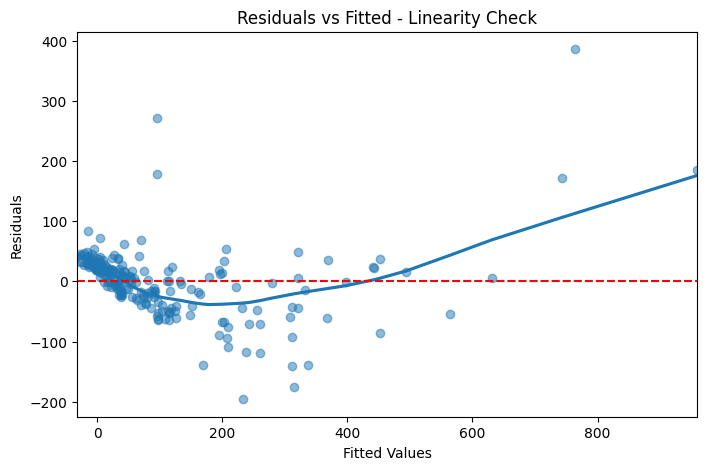

In [70]:
# Linearity Check - Residuals vs Fitted Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted - Linearity Check")
plt.axhline(y=0, color='red', linestyle='dashed')
plt.show()

### Interpretation of Linearity Check:
- The residuals vs. fitted plot is used to check the linearity assumption of the linear regression model.
- The plot shows a non-linear relationship between the residuals and fitted values, indicating that the model does not fully capture the non-linear association between the predictor variables and the outcome variable.
- The curvilinear pattern in the residuals suggests that the relationship between the predictors and outcome is non-linear, whereas the model assumes a linear association. 
- To improve model fit, non-linear terms or transformations of predictors may need to be incorporated to account for the non-linearity.

In [71]:
# Independence Check - Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.3f}")

Durbin-Watson Statistic: 1.202


### Interpretation of Independence Check:
- The Durbin-Watson statistic is used to check the independence assumption of the linear regression model.
- A Durbin-Watson statistic of 1.202 suggests positive autocorrelation in the residuals, indicating that errors are not completely independent. This may violate the assumption of independence in regression.

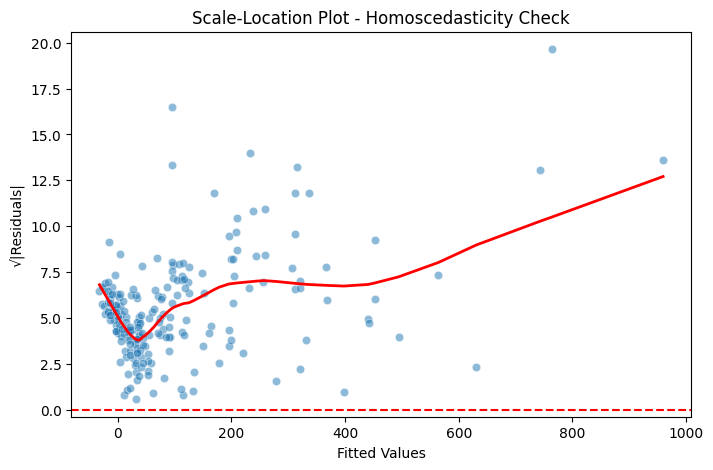

In [72]:
# Homoscedasticity Check - Scale-Location Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=model.fittedvalues, y=np.sqrt(np.abs(residuals)), alpha=0.5)
lowess = sm.nonparametric.lowess(np.sqrt(np.abs(residuals)), model.fittedvalues, frac=0.5)
plt.plot(*lowess.T, color='red', linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location Plot - Homoscedasticity Check")
plt.axhline(y=0, color='red', linestyle='dashed')
plt.show()


### Interpretation of Homoscedasticity Check:
- The scale-location plot is used to check the homoscedasticity assumption of the linear regression model.
- The plot shows the square root of the absolute residuals against the fitted values.
- The red LOWESS trend line helps to identify any patterns in the residuals indicating a violation of homoscedasticity.
- The plot shows a pattern in the residuals, suggesting that the variance of the residuals is not constant across the range of fitted values.
- The non-constant variance of the residuals indicates heteroscedasticity, which may affect the validity of statistical inference.
- To address heteroscedasticity, transformations or weighted least squares regression may be considered.

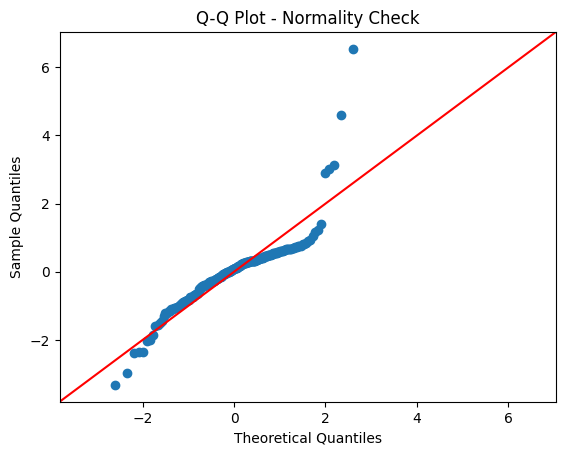

In [73]:
# Normality Check - Q-Q Plot
sm.qqplot(model.resid, line="45", fit=True)
plt.title("Q-Q Plot - Normality Check")
plt.show()

### Interpretation of Normality Check:
- The Q-Q plot is used to check the normality assumption of the linear regression model.
- An S-shaped pattern suggests skewness in the residuals and deviations from normality.
- The Q-Q plot shows that the residuals are not perfectly normally distributed, as they deviate from the 45-degree line.
- The deviations from the line indicate that the residuals are not normally distributed, which may affect the validity of statistical inference.
- Require modeling adjustments or transformations to improve normality.

In [74]:
# Normality Check - Anderson-Darling Test
# List of predictor variables excluding 'PRP'
predictor_vars = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

# Check normality of residuals for each predictor variable
for var in predictor_vars:
    print(f"\nChecking normality for {var}:")
    
    # Anderson-Darling test
    result = anderson(residuals, dist='norm')

    # Test statistic and critical values
    print(f'Anderson-Darling Statistic: {result.statistic:.3f}')
    print('Critical Values:', result.critical_values)
    
    # Interpretation at 5% significance level
    if result.statistic > result.critical_values[2]:
        print(f"The residuals for {var} are likely not normally distributed (reject H0 at 5% significance).")
    else:
        print(f"The residuals for {var} are likely normally distributed (fail to reject H0 at 5% significance).")
    


Checking normality for MYCT:
Anderson-Darling Statistic: 7.175
Critical Values: [0.566 0.644 0.773 0.901 1.072]
The residuals for MYCT are likely not normally distributed (reject H0 at 5% significance).

Checking normality for MMIN:
Anderson-Darling Statistic: 7.175
Critical Values: [0.566 0.644 0.773 0.901 1.072]
The residuals for MMIN are likely not normally distributed (reject H0 at 5% significance).

Checking normality for MMAX:
Anderson-Darling Statistic: 7.175
Critical Values: [0.566 0.644 0.773 0.901 1.072]
The residuals for MMAX are likely not normally distributed (reject H0 at 5% significance).

Checking normality for CACH:
Anderson-Darling Statistic: 7.175
Critical Values: [0.566 0.644 0.773 0.901 1.072]
The residuals for CACH are likely not normally distributed (reject H0 at 5% significance).

Checking normality for CHMIN:
Anderson-Darling Statistic: 7.175
Critical Values: [0.566 0.644 0.773 0.901 1.072]
The residuals for CHMIN are likely not normally distributed (reject H0

### Interpretation of Normality Check using Anderson-Darling Test:
- The Anderson-Darling test is used to check the normality assumption of the linear regression model.
- The Anderson-Darling test consistently rejects normality for all variables, indicating that residuals are not normally distributed.
- Consider data transformation (e.g., log, Box-Cox) or using robust regression methods to mitigate the impact of non-normality.


### 4) Verify the assumption of homoscedasticity computationally using the Non-Constant Variance Score (NCV) test.

In [75]:
# Checking Computational Homoscedasticity using NCV Test
_, pval, __, fval = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch-Pagan Test p-value: {pval:.4f}")
print(f"Breusch-Pagan Test F-value: {fval:.4f}")

Breusch-Pagan Test p-value: 0.0000
Breusch-Pagan Test F-value: 0.0000


### Interpretation of NCV Test:
- The Breusch-Pagan test is used to check the homoscedasticity assumption of the linear regression model.
- The Breusch-Pagan test yields a p-value of 0.0000, indicating strong evidence to reject the null hypothesis of homoscedasticity. This suggests the presence of heteroscedasticity (non-constant variance).
- Consider robust standard errors, weighted least squares (WLS), or transforming the dependent variable to address heteroscedasticity.

### 5) Assess the presence of significant outliers and explain their potential impact.

In [76]:
# Outlier Detection using Standardized Residuals
influence = OLSInfluence(model)
standardized_residuals = influence.resid_studentized_internal

outliers = np.where(np.abs(standardized_residuals) > 3)[0]
print(f"Significant Outliers (Indices): {outliers}")

Significant Outliers (Indices): [  9  30  31  82 168 198 199]


### Interpretation of Outlier Detection using standardized residuals:
- Outliers are observations that have a significant impact on the regression model.
- Significant Outliers (Indices): [ 9 30 31 82 168 198 199] implying that these indices correspond to the observations (rows) in the dataset where the standardized residuals exceed ±3. In other words, these are data points where the model's prediction error is unusually large, making them potential outliers.
- Outliers can have a significant impact on the regression coefficients, model fit, and prediction performance.

**Potential measures:**
- If the outliers are data errors, correct or remove them.
- If they are valid but extreme observations, try transforming the data (e.g., log transformation).
- If they heavily influence the model, consider using robust regression methods instead of ordinary least squares (OLS).

In [77]:
print(df1.iloc[[9, 30, 31, 82, 168, 198, 199]])


     MYCT   MMIN   MMAX  CACH  CHMIN  CHMAX   PRP
9      23  32000  64000   128     32     64  1144
30     25   1310   2620   131     12     24   274
31     25   1310   2620   131     12     24   368
82    300   1000  16000     8      2    112    38
168    38   8000  24000   160      4      8   140
198    30   8000  64000    96     12    176   915
199    30   8000  64000   128     12    176  1150


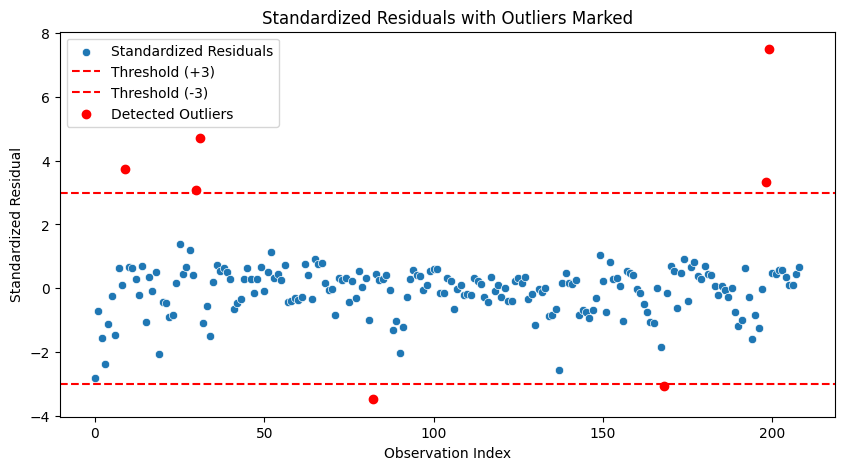

In [78]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(standardized_residuals)), y=standardized_residuals, label="Standardized Residuals")
plt.axhline(y=3, color='r', linestyle='dashed', label="Threshold (+3)")
plt.axhline(y=-3, color='r', linestyle='dashed', label="Threshold (-3)")
plt.scatter(outliers, standardized_residuals[outliers], color='red', label="Detected Outliers")
plt.legend()
plt.title("Standardized Residuals with Outliers Marked")
plt.xlabel("Observation Index")
plt.ylabel("Standardized Residual")
plt.show()

### Observations:
- The observations with indices [9, 30, 31, 82, 168, 198, 199] are identified as significant outliers based on the standardized residuals.
- These outliers may have a substantial impact on the regression model's coefficients and prediction performance.
- PRP (Processing Rate Performance) values for indices 9, 198, and 199 are quite high compared to others. These might be high-performance systems, which could be driving their high residuals.
- Index 82 has an exceptionally high MYCT (Machine Cycle Time) of 300, much higher than others.
- Indices 30 and 31 have nearly identical values, but their PRP values are quite different (274 vs. 368). This suggests either an error or a case where small input changes create significant output variations.
- Index 168 has low CHMIN and CHMAX compared to the rest, which might make it stand out in residual analysis.

### Identification of Influential Points using Cook's Distance:
- Cook's Distance is a measure of the influence of each observation on the regression coefficients.
- Points with high Cook's Distance have a significant impact on the regression model.
- Next computing Cook's Distance and identify influential points.

In [79]:
# Computing Cook's Distance
cooks_d = influence.cooks_distance[0]

influential_points = np.where(cooks_d > 1)[0]
print(f"Influential Points: {influential_points}")

Influential Points: [199]


- Indices [199] is the most influential point.
- This point has a significant impact on the regression coefficients and model fit.
- Removing this influential point may improve the model's stability and prediction performance.
- Next, we will remove this influential point and re-estimate the regression model to assess the impact.


In [80]:
# Remove only the most influential point
df_no_cook = df1.drop(index=influential_points)

# Re-run the regression
X_no_cook = df_no_cook.drop(columns=['PRP'])
y_no_cook = df_no_cook['PRP']
X_no_cook = sm.add_constant(X_no_cook)

model_no_cook = sm.OLS(y_no_cook, X_no_cook).fit()
print(model_no_cook.summary())


                            OLS Regression Results                            
Dep. Variable:                    PRP   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     240.1
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           8.81e-89
Time:                        21:49:01   Log-Likelihood:                -1109.8
No. Observations:                 208   AIC:                             2234.
Df Residuals:                     201   BIC:                             2257.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.3318      7.023     -6.028      0.0

### Interpretation of Model after removing the most influential point identified using Cook's Distance:
- After removing the most influential point based on Cook's Distance, the regression model is re-estimated.
- The model summary shows the coefficients, standard errors, t-values, and p-values for the predictors.
- The coefficients for MMIN, CACH, and CHMIN have become more stable, with reduced standard errors.
- The model improved overall fit and stability after removing the influential point, as seen in the increased R-sqaure, lower AIC/BIC, and more stable coefficients
- The Durbin-Watson statistic is still low, indicating potential autocorrelation in the residuals.
- The model suggest possible multicollinearity among predictors.
- The Jarque-Bera test still shows a high probability of non-normal residuals.
- The skewness and kurtosis values remain high, indicating a non-Gaussian distribution.
- The alternative approaches like robust regression or transformations should be considered.

### 6) Explain how you would mitigate the impact of the outlier. Then, implement measures to mitigate the impact of outliers (e.g., removal or other transformations of the data).

### Outlier Mitigation Strategies:
- Outliers can significantly impact the regression model's coefficients, fit, and prediction performance.
- Strategies to mitigate the impact of outliers include:
    1.  **Outlier Removal:** Identifying and removing outliers from the dataset to reduce their influence on the model.
    2. **Influential Point Analysis:** Identifying influential points using Cook's Distance or leverage statistics and evaluating their impact on the model.
    3. **Data Transformation:** Transforming the data using log, square root, or other transformations to reduce the impact of outliers.
    4. **Robust Regression:** Using robust regression methods that are less sensitive to outliers, such as robust linear regression or quantile regression.
    5. **Weighted Least Squares:** Assigning different weights to observations based on their influence to downweight outliers.
- In this case, we will remove the identified outliers based on standardized residuals and re-estimate the regression model.
        


In [81]:
# Removing Outliers identified using the Standardized Residuals
df_no_outlier = df1.drop(index=outliers)
# Redo Regression on Clean Data
X_no_outlier = df_no_outlier.drop(columns=['PRP'])
y_no_outlier = df_no_outlier['PRP']
X_no_outlier = sm.add_constant(X_no_outlier)

model_clean = sm.OLS(y_no_outlier, X_no_outlier).fit()
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                    PRP   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     350.3
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          1.53e-101
Time:                        21:49:01   Log-Likelihood:                -985.18
No. Observations:                 202   AIC:                             1984.
Df Residuals:                     195   BIC:                             2008.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.2475      4.899     -4.949      0.0

### Interpretation of Model after removing the identified outliers based on standardized residuals:
- After removing the identified outliers based on standardized residuals, the regression model is re-estimated.
- Improved Model Fit: After removing outliers, the R-squared increased significantly from 0.865 (original) to 0.915, indicating a better fit to the data.
- Better Model Selection Criteria: The AIC and BIC decreased considerably, suggesting that the final model is more optimal.
- Increased Statistical Significance: The F-statistic improved from 215.5 to 350.3, indicating stronger overall model significance.
- More Normal Residuals: The Omnibus test improved from 99.727 (highly non-normal) to 6.855, suggesting that the residuals are now much closer to a normal distribution.
- Coefficient Stability: Some variables (e.g., CHMIN, CHMAX) changed their statistical significance after removing outliers.

### 7) Discuss what other tests/transformations you could use if there are no outliers. Could a log transformation for reducing skewness be used? Explain.

### Other Tests/Transformations:
- If there are no outliers, but the data exhibits skewness or non-normality, additional tests and transformations can be considered to improve the model:
    1. **Log Transformation:** Log transformation is commonly used to reduce skewness in the data. It can help stabilize variance and make the data more normally distributed.
    2. **Box-Cox Transformation:** Box-Cox transformation is a family of power transformations that can handle different types of skewness. It automatically selects the best transformation based on the data.
    3. **Robust Regression:** Robust regression methods like M-estimation or MM-estimation are less sensitive to outliers and can handle non-normality better.


In [82]:
# Applying Log Transformation
df_log = df_no_outlier.copy()
df_log[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']] = df_log[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']].apply(lambda x: np.log1p(x))

# Fitting model with transformed data
X_log = df_log.drop(columns=['PRP'])
y_log = df_log['PRP']
X_log = sm.add_constant(X_log)

model_log = sm.OLS(y_log, X_log).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    PRP   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     160.6
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.17e-72
Time:                        21:49:02   Log-Likelihood:                -98.554
No. Observations:                 202   AIC:                             211.1
Df Residuals:                     195   BIC:                             234.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7411      0.536     -3.249      0.0

### Interpretation of Model after applying Log Transformation on Data without outliers:
- The model fit is slightly worse after log transformation 0.832 vs. 0.915 (after removing outliers). This suggests that the log transformation might not be the best choice if the goal is pure prediction accuracy.
- Omnibus test improved, indicating more normal residuals.
- Lower Multicollinearity Risk, as the condition number (248) is now much lower than before (33,000+), suggesting reduced multicollinearity implying that the model is more stable and interpretable.
- The predictor MYCT is no longer statistically significant (p = 0.345>0.05). CHMIN and CHMAX remain significant, but their effect sizes have changed.

### 8) Repeat steps 4-5, using the "cleaner" dataset.

In [83]:
#Creating a copy of the dataset as cleaner dataset without outliers
df_clean = df_no_outlier.copy()

In [84]:
# Preparing the data and rerunning the model as done for df_no_outlier
X_clean = df_clean.drop(columns=['PRP'])
y_clean = df_clean['PRP']
X_clean = sm.add_constant(X_clean)  # Add intercept

# Fitting the model
model_clean = sm.OLS(y_clean, X_clean).fit()

# Displaying results
print(model_clean.summary())

                            OLS Regression Results                            
Dep. Variable:                    PRP   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     350.3
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          1.53e-101
Time:                        21:49:02   Log-Likelihood:                -985.18
No. Observations:                 202   AIC:                             1984.
Df Residuals:                     195   BIC:                             2008.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.2475      4.899     -4.949      0.0

### Interpretation of Model for cleaned data:
- After removing the identified outliers based on standardized residuals, the regression model is re-estimated.
- Improved Model Fit: After removing outliers, the R-squared increased significantly from 0.865 (original) to 0.915, indicating a better fit to the data.
- Better Model Selection Criteria: The AIC and BIC decreased considerably, suggesting that the final model is more optimal.
- Increased Statistical Significance: The F-statistic improved from 215.5 to 350.3, indicating stronger overall model significance.
- More Normal Residuals: The Omnibus test improved from 99.727 (highly non-normal) to 6.855, suggesting that the residuals are now much closer to a normal distribution.
- Coefficient Stability: Some variables (e.g., CHMIN, CHMAX) changed their statistical significance after removing outliers.

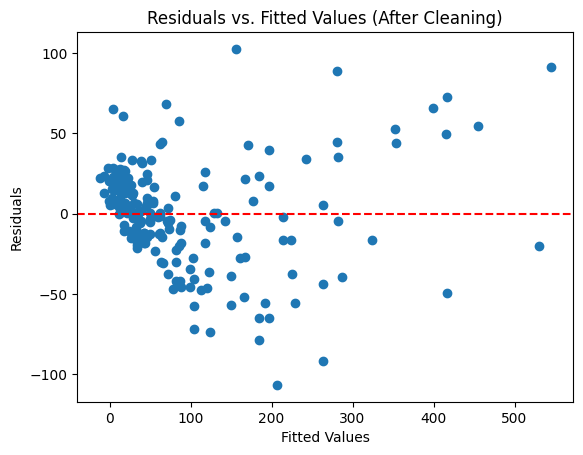

In [85]:
fitted_values = model_clean.fittedvalues
residuals = model_clean.resid

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values (After Cleaning)")
plt.show()

### Interpretation of Residuals vs. Fitted Values Plot:
As the plot shows a U-shape or any systematic curve, it would indicate non-linearity in the data, meaning that the relationship between the predictors and the dependent variable is not purely linear.

In [86]:
# Independence of Residuals (Durbin-Watson Test)
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.3f}")


Durbin-Watson Statistic: 1.180


### Interpretation of Durbin-Watson Test:
A Durbin-Watson statistic of 1.180 indicates positive autocorrelation in the residuals, suggesting that errors are correlated across observations. This violates the assumption of independent errors in the model.

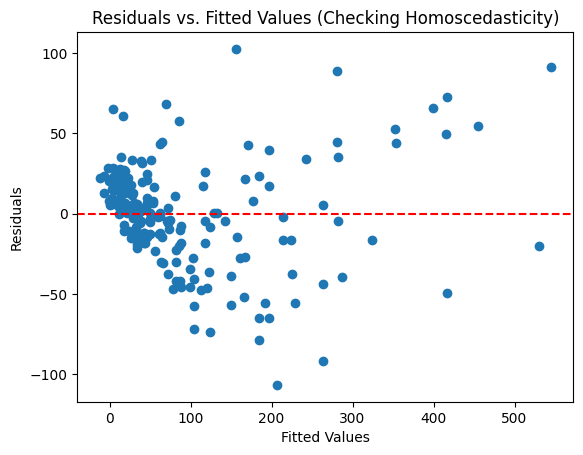

In [87]:
# Homoscedasticity Check
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values (Checking Homoscedasticity)")
plt.show()

### Interpretation of Homoscedasticity Check:
- The funnel shape in the Residuals vs. Fitted Values plot suggests heteroscedasticity, where the variance of residuals increases as the fitted values grow. 
- This indicates the model's errors are not consistent across all levels of the dependent variable, possibly reducing prediction accuracy for higher values.

In [88]:
# NCV Test (Computational Check for Homoscedasticity)
bp_test = het_breuschpagan(residuals, X_clean)
print(f"Breusch-Pagan Test p-value: {bp_test[1]:.5f}")


Breusch-Pagan Test p-value: 0.00000


### Interpretation of NCV Test:
A Breusch-Pagan test p-value of 0.00000 indicates significant heteroscedasticity, meaning the residual variance is not constant. This violates the OLS assumption of constant variance. To address this, we can use robust standard errors or apply a transformation to the dependent variable.

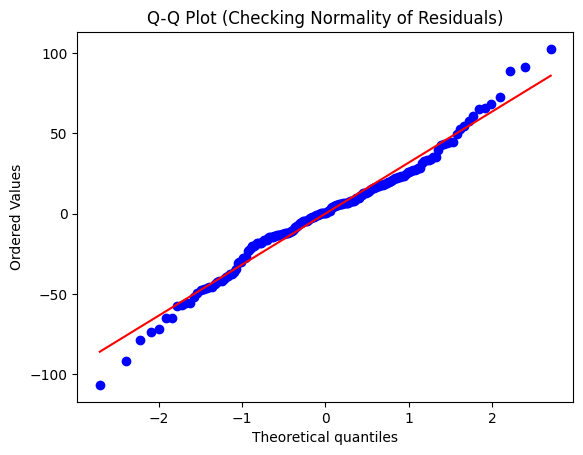

In [89]:
# Normality Check
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot (Checking Normality of Residuals)")
plt.show()


### Interpretation of Normality Check:
A slight S-shaped pattern in the Q-Q plot suggests that the residuals slightly deviate from normality. While the data is not perfectly normal, this deviation might not be severe enough to significantly impact the model. However, further analysis or transformations could be considered to improve normality.

In [90]:
# Perform Shapiro-Wilk test
stat, p_value = stats.shapiro(residuals)

# Print the test statistic and p-value
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Compare the p-value with the significance level
alpha = 0.05
if p_value > alpha:
    print("The residuals are normally distributed (fail to reject H0).")
else:
    print("The residuals are not normally distributed (reject H0).")

Shapiro-Wilk Test Statistic: 0.9802
P-value: 0.0061
The residuals are not normally distributed (reject H0).


### Interpretation of Shapiro-Wilk Test:
The Shapiro-Wilk test (p = 0.0061) shows that residuals are not normally distributed, which could affect hypothesis testing. Solutions include transforming the dependent variable or using robust regression methods.

In [91]:
influence_clean = OLSInfluence(model_clean)
cooks_d_clean = influence_clean.cooks_distance[0]

# Identify influential points
influential_points_clean = np.where(cooks_d_clean > 1)[0]
print(f"Influential Points After Cleaning: {influential_points_clean}")

Influential Points After Cleaning: []


### Interpretation of Influential Points after Cleaning:
No influential points were detected after cleaning, indicating that no individual data points are disproportionately affecting the model's fit. This is a positive sign for the stability of the regression results.

In [92]:
standardized_residuals_clean = influence_clean.resid_studentized_internal

# Identify new outliers (|residuals| > 3)
new_outliers = np.where(np.abs(standardized_residuals_clean) > 3)[0]
print(f"New Outliers in Cleaned Data: {new_outliers}")


New Outliers in Cleaned Data: [  8  62 163]


### Interpretation of Outliers Detection after Cleaning:
The new outliers in the cleaned data are observations at indices 8, 62, and 163. These points may be deviating significantly from the model’s expected values and could potentially impact the model's accuracy or assumptions. Further investigation or treatment may be needed.

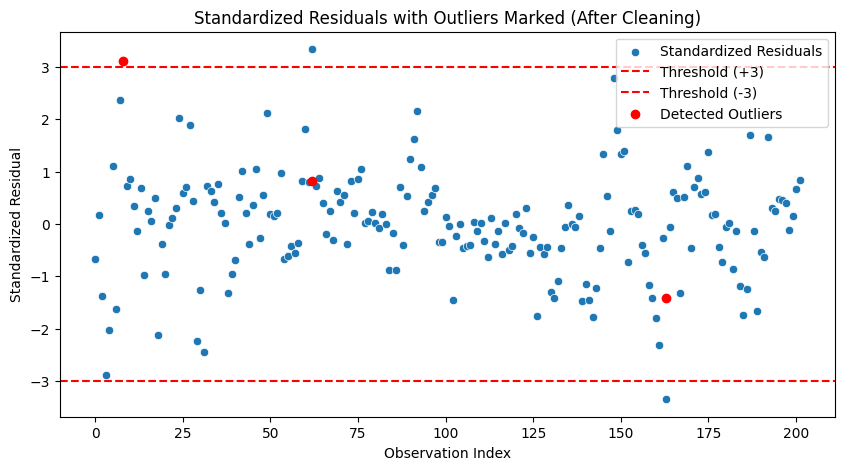

In [93]:
# Plotting Standardized Residuals with Outliers Marked
plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(standardized_residuals_clean)), y=standardized_residuals_clean, label="Standardized Residuals")
plt.axhline(y=3, color='r', linestyle='dashed', label="Threshold (+3)")
plt.axhline(y=-3, color='r', linestyle='dashed', label="Threshold (-3)")
plt.scatter(new_outliers, standardized_residuals_clean[new_outliers], color='red', label="Detected Outliers")
plt.legend()
plt.title("Standardized Residuals with Outliers Marked (After Cleaning)")
plt.xlabel("Observation Index")
plt.ylabel("Standardized Residual")
plt.show()


### Interpretation of the Standardized Residuals Plot after Cleaning:
The plot shows the standardized residuals after removing outliers. The red dashed lines represent the threshold of ±3 standard deviations, beyond which observations are considered outliers. The red points indicate the new outliers detected in the cleaned data, which may require further investigation or treatment.

### 9) Test collinearity using the Variance Inflation Factor. Use the vif function in R or Python.

In [94]:
# Checking for Multicollinearity using VIF
vif_data_clean = pd.DataFrame()
vif_data_clean["Feature"] = X_clean.columns
vif_data_clean["VIF"] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]

print(vif_data_clean)


  Feature       VIF
0   const  4.640702
1    MYCT  1.244925
2    MMIN  2.670119
3    MMAX  2.787814
4    CACH  1.907073
5   CHMIN  2.239122
6   CHMAX  1.939315


### Interpretation of VIF Results:
The Variance Inflation Factor (VIF) values indicate the degree of multicollinearity among the predictors:
- VIF < 5 (for all variables): Suggests that multicollinearity is not problematic in the model.
- The highest VIF is 4.64 for the constant term, which is still below the typical threshold (VIF > 10) for indicating significant multicollinearity issues.
- The VIF values for the predictors are within an acceptable range, indicating that multicollinearity is not a major concern in the model.

### 10) Assess the overall validity of the regression model and present your final assessment regarding its readiness and suitability for making predictions.

In [95]:
# Model Evaluation
print("Final Model Evaluation:")
print(f"R-squared: {model_clean.rsquared:.4f}")
print(f"Adjusted R-squared: {model_clean.rsquared_adj:.4f}")
print(f"Durbin-Watson Statistic: {durbin_watson(model_clean.resid):.4f}")

Final Model Evaluation:
R-squared: 0.9151
Adjusted R-squared: 0.9125
Durbin-Watson Statistic: 1.1805


### Final Model Evaluation:
- R-squared (0.9151): The model explains 91.51% of the variance in the dependent variable (PRP), indicating a strong fit.
- Adjusted R-squared (0.9125): Adjusted for the number of predictors, this value still reflects a strong model fit.
- Durbin-Watson (1.1805): Indicates positive autocorrelation in residuals, which may require addressing for improved model validity.

### 11) Given your analysis, describe the recommendations you would make to a researcher intent on using this data in a multiple linear regression model.

### Based on the models analyzed, it can be inferred that:
- The Durbin-Watson statistic suggests positive autocorrelation in the residuals. To improve the model, consider adding lagged variables or using methods like Generalized Least Squares to correct for this issue.
- There was the presence of outliers on indices [ 9 30 31 82 168 198 199] implying that these indices correspond to the observations (rows) in the dataset where the standardized residuals exceed ±3. In other words, these are data points where the model's prediction error is unusually large, making them potential outliers.
- Indices [199] is the most influential point, which can have a significant impact on the regression coefficients and model fit. Removing this influential point may improve the model's stability and prediction performance.
- The residual plot showing a funnel shape indicates potential non-constant variance (heteroscedasticity), which can affect the model’s efficiency.
- The VIF values are generally low (all below 5), indicating no significant multicollinearity.
-  The Shapiro-Wilk test and anderson test result indicates that residuals are not normally distributed. While the model is robust to deviations from normality, we might consider applying transformations to the dependent variable (PRP) to better meet normality assumptions, or use non-parametric methods.
- With a high R-squared (0.9151) and Adjusted R-squared (0.9125), the model fits the data well. However, given the residual and normality concerns, further refinement through transformations could improve prediction accuracy and assumptions.

### Conclusions on Prediction Performance

The model's R-squared value of 0.9151 and Adjusted R-squared of 0.9125 indicate strong explanatory power on the training data. However, the Durbin-Watson statistic (1.1805) and residual plots show evidence of autocorrelation and heteroscedasticity, suggesting that the model may struggle to generalize well on new data. Also, the model can have prediction issues.

### References

Feldmesser, J. (1987). Computer Hardware [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5830D.
